In [44]:
def bron_kerbosch(R, P, X, graph, cliques):
    """
    Алгоритм Брона и Кербоша для поиска всех максимальных клик.

    :param R: множество вершин, уже включенных в текущую клику
    :param P: множество вершин, которые могут быть добавлены в текущую клику
    :param X: множество вершин, которые уже проверены и не могут быть добавлены в текущую клику
    :param graph: представление графа в виде словаря смежности
    :param cliques: список для хранения всех найденных максимальных клик
    """
    if not P and not X:
        cliques.append(R)
        return

    for v in list(P):
        bron_kerbosch(
            R.union({v}),
            P.intersection(graph[v]),
            X.intersection(graph[v]),
            graph,
            cliques
        )
        P.remove(v)
        X.add(v)


def find_maximal_cliques(graph):
    """
    Находит все максимальные клики в графе.

    :param graph: представление графа в виде словаря смежности
    :return: список максимальных клик
    """
    cliques = []
    bron_kerbosch(set(), set(graph.keys()), set(), graph, cliques)
    return cliques

"""
A -- B -- D -- E
 \   |   /
     C
"""
graph = {
    'A': {'B', 'C'},
    'B': {'A', 'C', 'D'},
    'C': {'A', 'B', 'D'},
    'D': {'B', 'C', 'E'},
    'E': {'D'}
}

# Проверка адекватности
assert len(find_maximal_cliques(graph)) == 3

In [45]:
def bron_kerbosch_with_ordering(graph):
    """
    Реализация алгоритма Брона-Кербоша с упорядочиванием вершин (с использованием дегенеративного порядка).

    :param graph: представление графа в виде словаря смежности
    :return: список всех максимальных клик
    """

    def degeneracy_ordering(graph):
        """
        Находит дегенеративный порядок вершин графа.

        :param graph: представление графа в виде словаря смежности
        :return: список вершин в дегенеративном порядке
        """
        ordering = []
        degrees = {v: len(neighbors) for v, neighbors in graph.items()}
        vertices = set(graph.keys())

        while vertices:
            min_vertex = min(vertices, key=lambda v: degrees[v])
            ordering.append(min_vertex)
            vertices.remove(min_vertex)

            for neighbor in graph[min_vertex]:
                if neighbor in vertices:
                    degrees[neighbor] -= 1

        return ordering

    def bron_kerbosch_with_pivot(R, P, X):
        if not P and not X:
            cliques.append(R)
            return

        pivot = next(iter(P.union(X)))
        for v in list(P - graph[pivot]):
            bron_kerbosch_with_pivot(
                R.union({v}),
                P.intersection(graph[v]),
                X.intersection(graph[v])
            )
            P.remove(v)
            X.add(v)

    ordering = degeneracy_ordering(graph)
    cliques = []
    P = set(graph.keys())
    R = set()
    X = set()

    for v in ordering:
        bron_kerbosch_with_pivot(
            R.union({v}),
            P.intersection(graph[v]),
            X.intersection(graph[v])
        )
        P.remove(v)
        X.add(v)

    return cliques

# Проверка адекватности
assert len(bron_kerbosch_with_ordering(graph)) == 3

Первый тест - случайные графы

In [46]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
def generate_random_graph(num_vertices, p):
    """
    Генерирует случайный граф.

    :param num_vertices: количество вершин
    :param p: вероятность существования ребра между двумя вершинами
    :return: граф в виде словаря смежности
    """
    graph = {i: set() for i in range(num_vertices)}
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            if random.random() < p:
                graph[i].add(j)
                graph[j].add(i)
    return graph


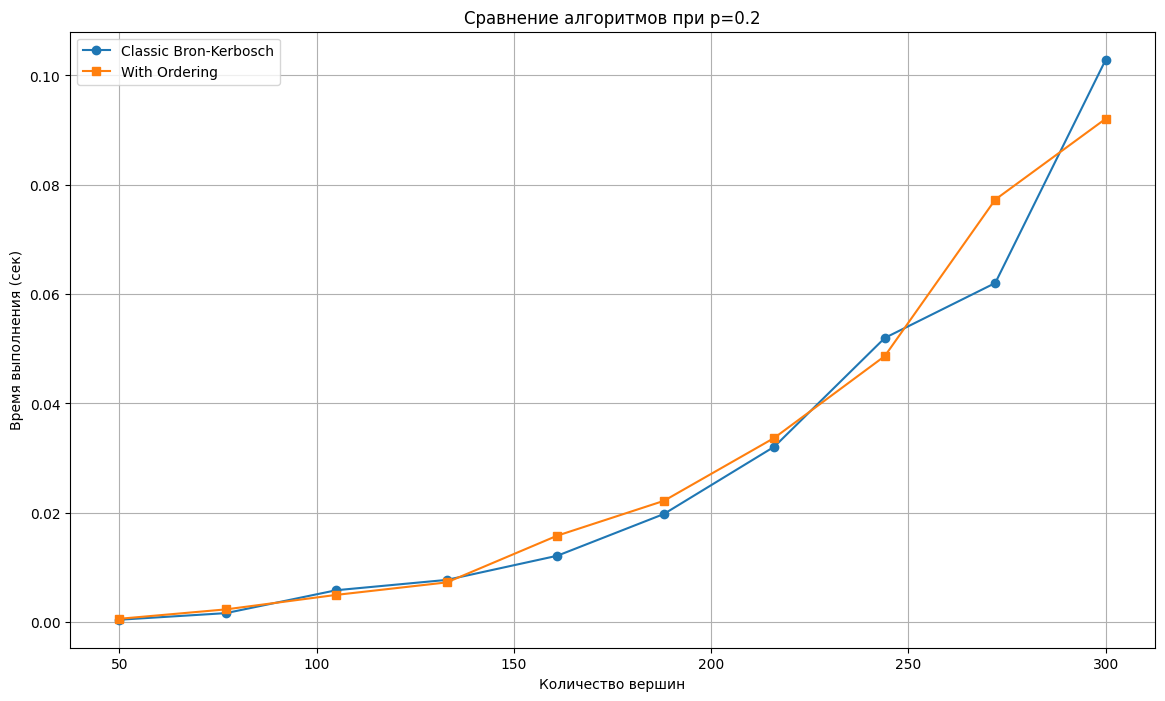

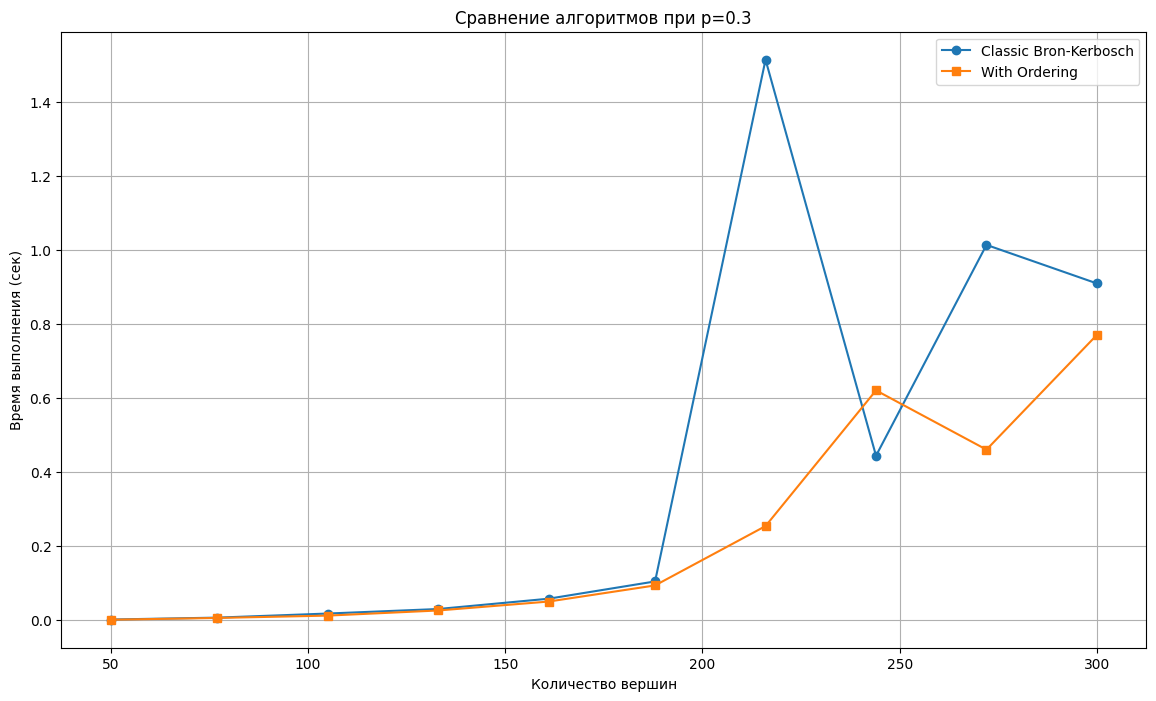

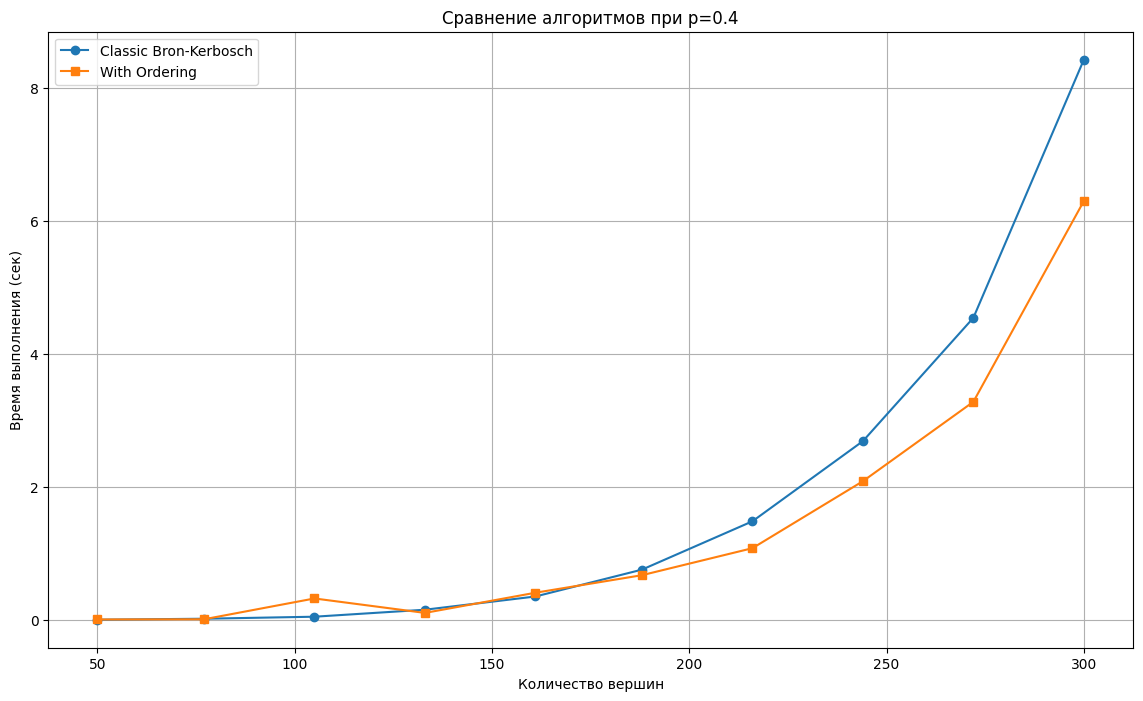

In [48]:
vertex_counts = np.linspace(50, 300, 10, dtype=int)
probabilities = [0.2, 0.3, 0.4]

for p in probabilities:
    results_classic = []
    results_ordering = []

    for num_vertices in vertex_counts:
        graph = generate_random_graph(num_vertices, p)

        start_time = time.time()
        find_maximal_cliques(graph)
        elapsed_time_classic = time.time() - start_time
        results_classic.append(elapsed_time_classic)

        start_time = time.time()
        bron_kerbosch_with_ordering(graph)
        elapsed_time_ordering = time.time() - start_time
        results_ordering.append(elapsed_time_ordering)

    plt.figure(figsize=(14, 8))
    plt.plot(vertex_counts, results_classic, label="Classic Bron-Kerbosch", marker='o')
    plt.plot(vertex_counts, results_ordering, label="With Ordering", marker='s')
    plt.xlabel("Количество вершин")
    plt.ylabel("Время выполнения (сек)")
    plt.title(f"Сравнение алгоритмов при p={p}")
    plt.legend()
    plt.grid(True)
    plt.show()


Далее рассмотрим полные графы

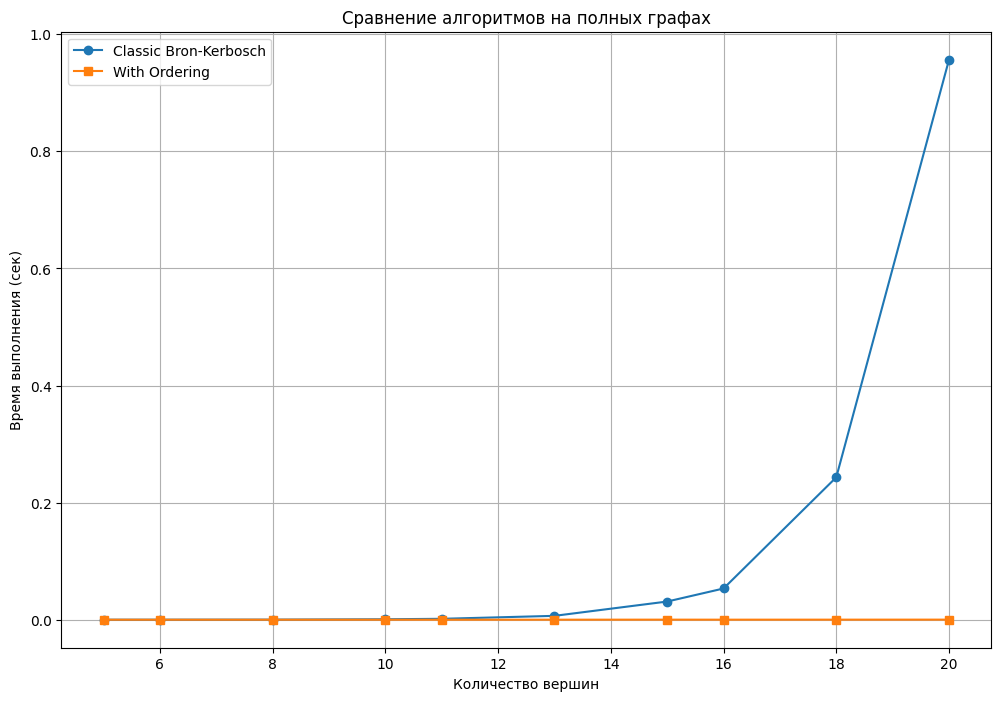

In [53]:
def generate_complete_graph(num_vertices):
    """
    Генерирует полный граф.

    :param num_vertices: количество вершин
    :return: граф в виде словаря смежности
    """
    return {i: set(j for j in range(num_vertices) if j != i) for i in range(num_vertices)}

vertex_counts = np.linspace(5, 20, 10, dtype=int)

results_classic = []
results_ordering = []

for num_vertices in vertex_counts:
    graph = generate_complete_graph(num_vertices)

    start_time = time.time()
    find_maximal_cliques(graph)
    elapsed_time_classic = time.time() - start_time
    results_classic.append(elapsed_time_classic)

    start_time = time.time()
    bron_kerbosch_with_ordering(graph)
    elapsed_time_ordering = time.time() - start_time
    results_ordering.append(elapsed_time_ordering)

plt.figure(figsize=(12, 8))
plt.plot(vertex_counts, results_classic, label="Classic Bron-Kerbosch", marker='o')
plt.plot(vertex_counts, results_ordering, label="With Ordering", marker='s')
plt.xlabel("Количество вершин")
plt.ylabel("Время выполнения (сек)")
plt.title("Сравнение алгоритмов на полных графах")
plt.legend()
plt.grid(True)
plt.show()


Для наглядности посмотрим отдельно на полные графы у алгоритма with pivoting

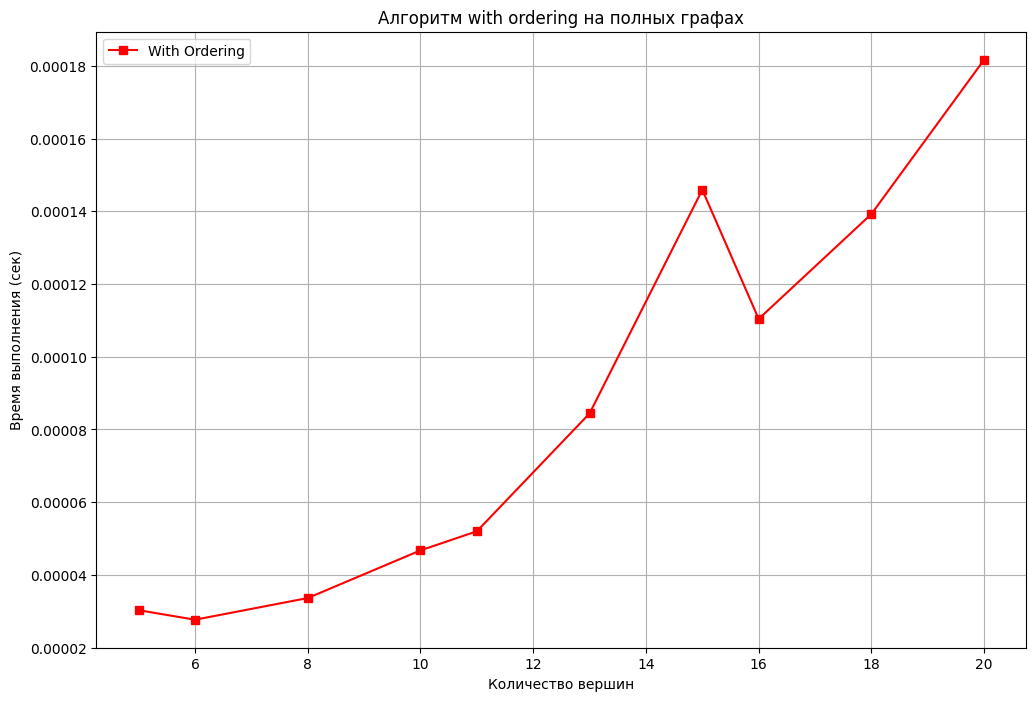

In [59]:
plt.figure(figsize=(12, 8))
plt.plot(vertex_counts, results_ordering, label="With Ordering", color='red', marker='s')
plt.xlabel("Количество вершин")
plt.ylabel("Время выполнения (сек)")
plt.title("Алгоритм with ordering на полных графах")
plt.legend()
plt.grid(True)
plt.show()


А теперь графы-Турана

In [60]:
def generate_turan_graph(num_vertices, num_parts):
    """
    Генерирует граф Турана T(n, r).

    :param num_vertices: количество вершин n
    :param num_parts: количество частей r
    :return: граф в виде словаря смежности
    """
    partitions = [[] for _ in range(num_parts)]
    for i, v in enumerate(range(num_vertices)):
        partitions[i % num_parts].append(v)

    graph = {i: set() for i in range(num_vertices)}
    for i in range(num_parts):
        for j in range(i + 1, num_parts):
            for u in partitions[i]:
                for v in partitions[j]:
                    graph[u].add(v)
                    graph[v].add(u)
    return graph


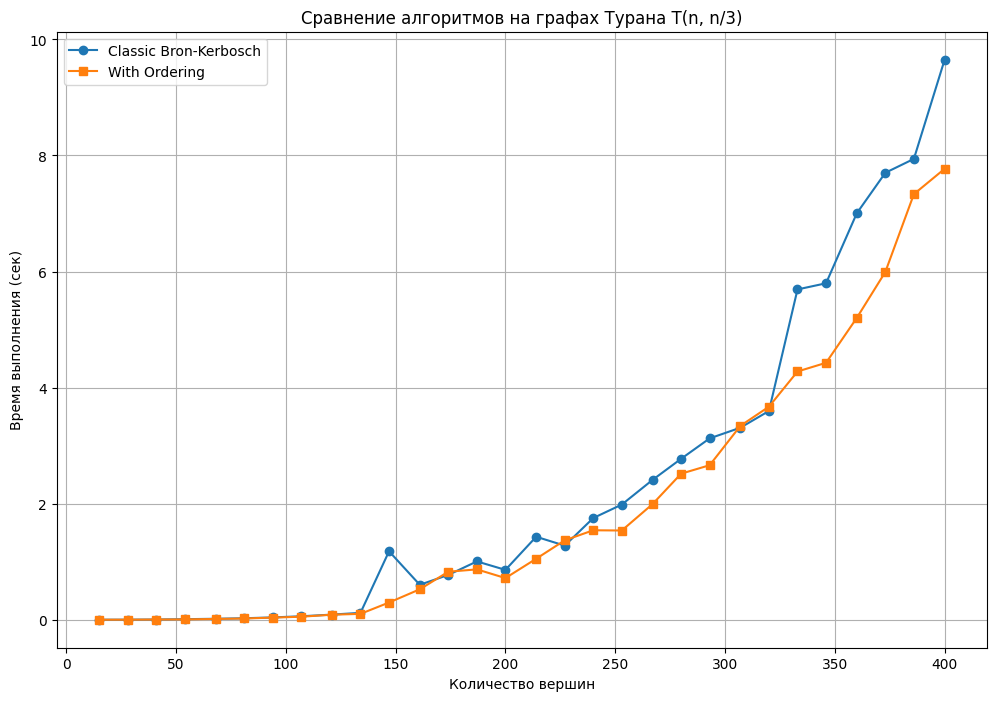

In [61]:
vertex_counts = np.linspace(15, 500, 30, dtype=int)
results_classic_turan = []
results_ordering_turan = []
num_parts = 3  # T(n, n/3)

for num_vertices in vertex_counts:
    graph = generate_turan_graph(num_vertices, num_parts)

    start_time = time.time()
    find_maximal_cliques(graph)
    elapsed_time_classic = time.time() - start_time
    results_classic_turan.append(elapsed_time_classic)

    start_time = time.time()
    bron_kerbosch_with_ordering(graph)
    elapsed_time_ordering = time.time() - start_time
    results_ordering_turan.append(elapsed_time_ordering)

plt.figure(figsize=(12, 8))
plt.plot(vertex_counts, results_classic_turan, label="Classic Bron-Kerbosch", marker='o')
plt.plot(vertex_counts, results_ordering_turan, label="With Ordering", marker='s')
plt.xlabel("Количество вершин")
plt.ylabel("Время выполнения (сек)")
plt.title("Сравнение алгоритмов на графах Турана T(n, n/3)")
plt.legend()
plt.grid(True)
plt.show()
